# Content 
There are 25 variables:

ID: ID of each client <br>
LIMIT_BAL(한도잔액): Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<상환상태><br>
PAY_2: Repayment status in August, 2005 (scale same as above)<br>
PAY_3: Repayment status in July, 2005 (scale same as above)<br>
PAY_4: Repayment status in June, 2005 (scale same as above)<br>
PAY_5: Repayment status in May, 2005 (scale same as above)<br>
PAY_6: Repayment status in April, 2005 (scale same as above)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<청구 명세서 금액><br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<지불한 금액><br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>
default.payment.next.month: Default payment (1=yes, 0=no)<br>

In [1]:
import seaborn as sns

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.normalization import BatchNormalization
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../Competition2/default of credit card clients.csv')

In [3]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
data.columns = data.iloc[0,:]
data = data.drop(0, axis=0)
data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTATE_9',
       'PAYSTATE_8', 'PAYSTATE_7', 'PAYSTATE_6', 'PAYSTATE_5', 'PAYSTATE_4', 'BILL_AMT9', 'BILL_AMT8',
       'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'PAY_AMT9',
       'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT']
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYSTATE_9,PAYSTATE_8,PAYSTATE_7,PAYSTATE_6,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.info()
print('-----------------------------------------------------------------------------------')
print(data.describe())
print('-----------------------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
ID            30000 non-null object
LIMIT_BAL     30000 non-null object
SEX           30000 non-null object
EDUCATION     30000 non-null object
MARRIAGE      30000 non-null object
AGE           30000 non-null object
PAYSTATE_9    30000 non-null object
PAYSTATE_8    30000 non-null object
PAYSTATE_7    30000 non-null object
PAYSTATE_6    30000 non-null object
PAYSTATE_5    30000 non-null object
PAYSTATE_4    30000 non-null object
BILL_AMT9     30000 non-null object
BILL_AMT8     30000 non-null object
BILL_AMT7     30000 non-null object
BILL_AMT6     30000 non-null object
BILL_AMT5     30000 non-null object
BILL_AMT4     30000 non-null object
PAY_AMT9      30000 non-null object
PAY_AMT8      30000 non-null object
PAY_AMT7      30000 non-null object
PAY_AMT6      30000 non-null object
PAY_AMT5      30000 non-null object
PAY_AMT4      30000 non-null object
DEFAULT       30000 non-nul

In [6]:
data = data.astype(float)

In [7]:
data.SEX.value_counts()
#X2 : 성 (1 = 남성, 2 = 여성)

2.0    18112
1.0    11888
Name: SEX, dtype: int64

In [8]:
data.EDUCATION.value_counts()
#X3 : 교육 (1 = 대학원, 2 = 대학, 3 = 고등학생, 4 = 기타)

2.0    14030
1.0    10585
3.0     4917
5.0      280
4.0      123
6.0       51
0.0       14
Name: EDUCATION, dtype: int64

In [9]:
data.MARRIAGE.value_counts()
#X4 : 결혼 상태 (1 = 결혼; 2 = 단일; 3 = 다른 것)

2.0    15964
1.0    13659
3.0      323
0.0       54
Name: MARRIAGE, dtype: int64

In [10]:
data = data[data.EDUCATION.isin([1,2,3])]
data = data[data.MARRIAGE.isin([1,2])]

#drop index
data = data.reset_index().drop('index',axis=1)

In [11]:
#check the null values
data.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAYSTATE_9    0
PAYSTATE_8    0
PAYSTATE_7    0
PAYSTATE_6    0
PAYSTATE_5    0
PAYSTATE_4    0
BILL_AMT9     0
BILL_AMT8     0
BILL_AMT7     0
BILL_AMT6     0
BILL_AMT5     0
BILL_AMT4     0
PAY_AMT9      0
PAY_AMT8      0
PAY_AMT7      0
PAY_AMT6      0
PAY_AMT5      0
PAY_AMT4      0
DEFAULT       0
dtype: int64

In [12]:
print ("DEFAULT :")
print (data.AGE[data.DEFAULT == 1].describe())
print ("-"*20)
print ("NO DEFAULT :")
print (data.AGE[data.DEFAULT == 0].describe())

DEFAULT :
count    6514.000000
mean       35.612834
std         9.651660
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64
--------------------
NO DEFAULT :
count    22649.000000
mean        35.326637
std          9.040744
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


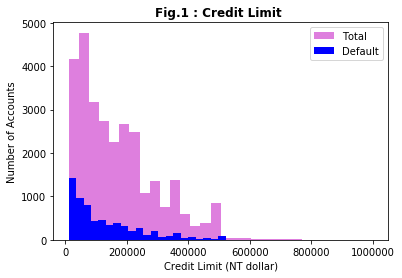

In [13]:
# Credit Limit (Feature name :'LIMIT_BAL' )
%matplotlib inline
bins = 30
plt.hist(data.LIMIT_BAL, bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(data.LIMIT_BAL[data['DEFAULT'] == 1], bins = bins, color='b',label = 'Default')

plt.xlabel('Credit Limit (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Fig.1 : Credit Limit ',fontweight="bold", size=12)
plt.legend();plt.show()

신용한도가 낮은 사람 일수록 체납률이 높다.

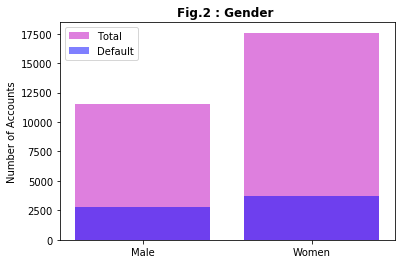

Ratio of Male(Default/Total) : 24.33693304535637
Ratio of Women(Default/Total) : 21.0200136456675


In [14]:
# Gender (Feature name :'SEX' )
men = data['SEX'][data['SEX']==1].count()
men_default = data['SEX'][(data['SEX']==1)&(data['DEFAULT']==1)].count()

women = data['SEX'][data['SEX']==2].count()
women_default = data['SEX'][(data['SEX']==2)&(data['DEFAULT']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='m',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='b',alpha=0.5, label='Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()
print("Ratio of Male(Default/Total) :",(men_default/men)*100)
print("Ratio of Women(Default/Total) :",(women_default/women)*100)

체납율: 남성이 여성보다 약 3% 높음.

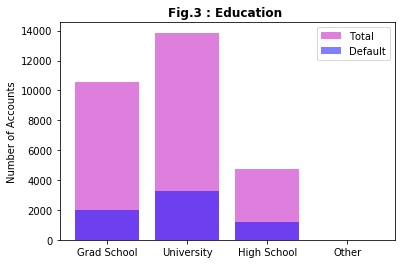

Ratio of GradSchool(Default/Total) : 19.20995157155066
Ratio of University(Default/Total) : 23.69787909392584
Ratio of HighSchool(Default/Total) : 25.28301886792453


In [15]:
# Education (Feature name :'EDUCATION' )
grad =  data['EDUCATION'][data['EDUCATION']==1].count()
grad_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['DEFAULT']==1)].count()

uni =  data['EDUCATION'][data['EDUCATION']==2].count()
uni_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['DEFAULT']==1)].count()

high =  data['EDUCATION'][data['EDUCATION']==3].count()
high_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['DEFAULT']==1)].count()

other =  data['EDUCATION'][data['EDUCATION'] > 3].count()
other_default = data['EDUCATION'][(data['EDUCATION'] > 3)&(data['DEFAULT']==1)].count()

total_education = [grad, uni, high, other]
default_education = [grad_default,uni_default,high_default, other_default]
degree = [1,2,3,4]
plt.bar(degree,total_education, color='m',alpha=0.5, label='Total')
plt.bar(degree,default_education, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3,4],['Grad School','University','High School','Other'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : Education ',fontweight="bold", size=12)
plt.legend();plt.show()

print("Ratio of GradSchool(Default/Total) :",(grad_default/grad)*100)
print("Ratio of University(Default/Total) :",(uni_default/uni)*100)
print("Ratio of HighSchool(Default/Total) :",(high_default/high)*100)

체납율: HighSchool > University > GradSchool <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;(25%)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(23%)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(19%)

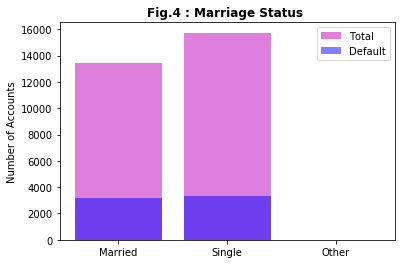

Ratio of Married (Default/Total) : 23.754189944134076
Ratio of Single (Default/Total) : 21.127208031516076


In [16]:
# Marriage Status (Feature name :'MARRIAGE')
married =  data['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = data['MARRIAGE'][(data['MARRIAGE']==1)&(data['DEFAULT']==1)].count()

single =  data['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = data['MARRIAGE'][(data['MARRIAGE']==2)&(data['DEFAULT']==1)].count()

other =  data['MARRIAGE'][data['MARRIAGE']==3].count()
other_default = data['MARRIAGE'][(data['MARRIAGE']==3)&(data['DEFAULT']==1)].count()

total_marriage = [married, single, other]
default_marriage = [married_default,single_default,other_default]
status = [1,2,3]
plt.bar(status,total_marriage, color='m',alpha=0.5, label='Total')
plt.bar(status,default_marriage, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3],['Married','Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

print("Ratio of Married (Default/Total) :",(married_default/married)*100)
print("Ratio of Single (Default/Total) :",(single_default/single)*100)


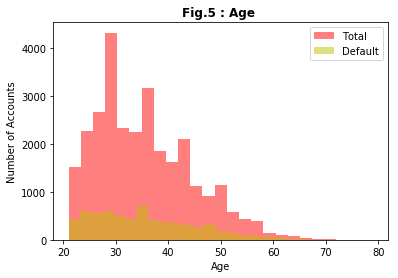

In [17]:
# Age (Feature name :'AGE' )
bins = 25

plt.hist(data['AGE'],bins = bins, color='r',label = 'Total',alpha=0.5)
plt.hist(data['AGE'][data['DEFAULT']==1], bins = bins, color='y',label = 'Default',alpha=0.5)

plt.xlabel('Age'); plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Age ',fontweight="bold", size=12)
plt.legend();plt.show()



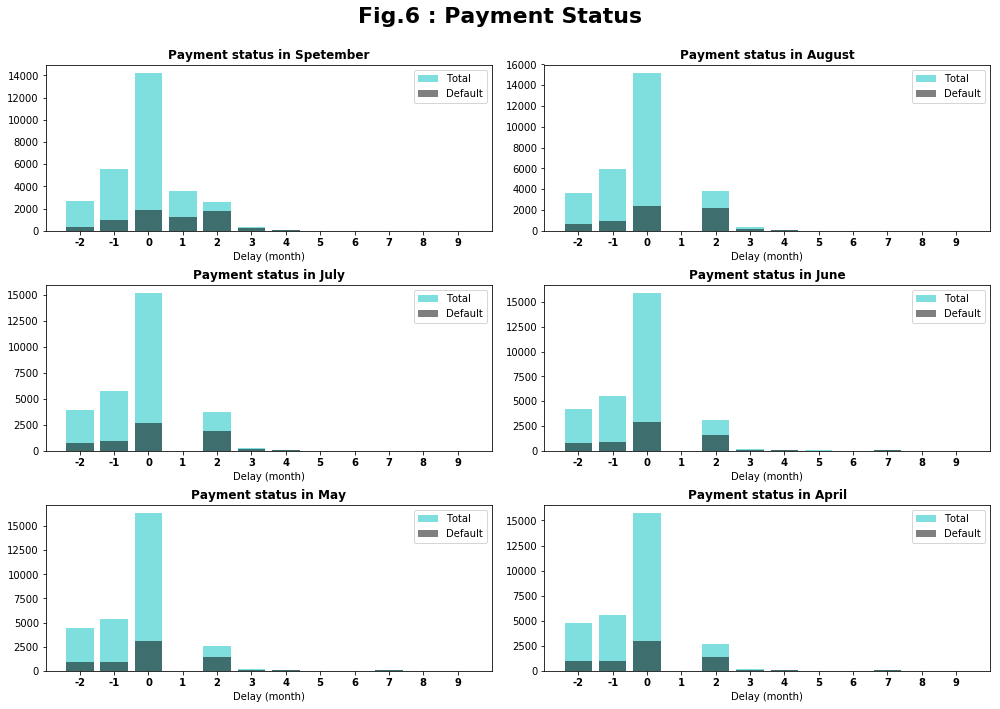

In [18]:
# Payment status (Feature name :'PAY_' )
import matplotlib.gridspec as gridspec
features = list(data.columns)
plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Fig.6 : Payment Status',fontweight="bold", fontsize=22)
for cn in features[6:12]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = data[cn][data[cn]==j-2].count()
            delay_default[j] = data[cn][(data[cn]==j-2)&(data['DEFAULT']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='c',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='k',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['-2','-1','0','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

==========================================================================

In [19]:
#Dummyify the columns
data.columns
dummy_SEX = pd.get_dummies(data['SEX'], prefix='SEX')
dummy_EDUCATION = pd.get_dummies(data['EDUCATION'], prefix='EDU')
dummy_MARRIAGE = pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE')
data = pd.concat([data,dummy_SEX,dummy_EDUCATION,dummy_MARRIAGE],axis=1)


In [20]:
data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTATE_9',
       'PAYSTATE_8', 'PAYSTATE_7', 'PAYSTATE_6', 'PAYSTATE_5', 'PAYSTATE_4',
       'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5',
       'BILL_AMT4', 'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5',
       'PAY_AMT4', 'DEFAULT', 'MALE','FEMALE', 'GRADSCHOOL', 'COLLEAGE','HIGHSCHOOL', 'MARRIED','SINGLE']
data = data.drop(['ID','SEX','EDUCATION','MARRIAGE'],axis=1)

In [21]:
#Dataframe for logistic regression
dfl = data[['LIMIT_BAL','AGE', 'PAYSTATE_9',
       'PAYSTATE_8', 'PAYSTATE_7', 'PAYSTATE_6', 'PAYSTATE_5', 'PAYSTATE_4',
       'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5',
       'BILL_AMT4', 'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5',
       'PAY_AMT4', 'DEFAULT', 'MALE','FEMALE', 'GRADSCHOOL', 'COLLEAGE','HIGHSCHOOL', 'MARRIED','SINGLE']]


#Dataframe for feedforward neural network
dff = data[['LIMIT_BAL','AGE', 'PAYSTATE_9',
       'PAYSTATE_8', 'PAYSTATE_7', 'PAYSTATE_6', 'PAYSTATE_5', 'PAYSTATE_4',
       'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5',
       'BILL_AMT4', 'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5',
       'PAY_AMT4', 'DEFAULT', 'MALE','FEMALE', 'GRADSCHOOL', 'COLLEAGE','HIGHSCHOOL', 'MARRIED','SINGLE']]

#Dataframe for recurrent neural network
dfr = data[['LIMIT_BAL','AGE', 'PAYSTATE_9',
       'PAYSTATE_8', 'PAYSTATE_7', 'PAYSTATE_6', 'PAYSTATE_5', 'PAYSTATE_4',
       'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5',
       'BILL_AMT4', 'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5',
       'PAY_AMT4', 'DEFAULT', 'MALE','FEMALE', 'GRADSCHOOL', 'COLLEAGE','HIGHSCHOOL', 'MARRIED','SINGLE']]


# DNN

In [22]:
X = dfr.drop('DEFAULT',axis=1)
Y = np_utils.to_categorical(dfr['DEFAULT'], 2)

In [23]:
%%time

# Define Model Architecture
NB_EPOCH = 7
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam() # Adam optimizer
N_HIDDEN1 = 128
N_HIDDEN2 = 64
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.2

def your_model() :
    model = Sequential()
    model.add(Dense(N_HIDDEN1, input_shape=(X.shape[1],)))
    model.add(Activation('tanh'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(N_HIDDEN2))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
    return model

# Instantiate the Scikit-Learn classifier interface
dnn = KerasClassifier(build_fn=your_model, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE)

# Evaluate using 5-fold cross validation
cv_results = cross_val_score(dnn, X, Y, cv=5)
print(cv_results)
print(cv_results.mean(), cv_results.std())

Epoch 1/7
23330/23330 [==============================] - 1s 32us/step - loss: 0.5743 - acc: 0.7542
Epoch 2/7
23330/23330 [==============================] - 0s 17us/step - loss: 0.5306 - acc: 0.7755
Epoch 3/7
23330/23330 [==============================] - 0s 16us/step - loss: 0.5280 - acc: 0.7757
Epoch 4/7
23330/23330 [==============================] - 0s 16us/step - loss: 0.5238 - acc: 0.7760
Epoch 5/7
23330/23330 [==============================] - 0s 16us/step - loss: 0.5243 - acc: 0.7760
Epoch 6/7
23330/23330 [==============================] - 0s 15us/step - loss: 0.5253 - acc: 0.7760
Epoch 7/7
5833/5833 [==============================] - 0s 11us/step
Epoch 1/7
23330/23330 [==============================] - 1s 30us/step - loss: 0.5453 - acc: 0.7734
Epoch 2/7
23330/23330 [==============================] - 0s 18us/step - loss: 0.5261 - acc: 0.7787
Epoch 3/7
23330/23330 [==============================] - 0s 16us/step - loss: 0.5235 - acc: 0.7787
Epoch 4/7
23330/23330 [==================

# LSTM

In [24]:
data

,LIMIT_BAL,AGE,PAYSTATE_9,PAYSTATE_8,PAYSTATE_7,PAYSTATE_6,PAYSTATE_5,PAYSTATE_4,BILL_AMT9,BILL_AMT8,...,PAY_AMT5,PAY_AMT4,DEFAULT,MALE,FEMALE,GRADSCHOOL,COLLEAGE,HIGHSCHOOL,MARRIED,SINGLE
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0.0,0.0,1.0,0,1,0,1,0,1,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0.0,2000.0,1.0,0,1,0,1,0,0,1
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,1000.0,5000.0,0.0,0,1,0,1,0,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,1069.0,1000.0,0.0,0,1,0,1,0,1,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,689.0,679.0,0.0,1,0,0,1,0,1,0
5,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,...,1000.0,800.0,0.0,1,0,1,0,0,0,1
6,500000.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,...,13750.0,13770.0,0.0,1,0,1,0,0,0,1
7,100000.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,...,1687.0,1542.0,0.0,0,1,0,1,0,0,1
8,140000.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,...,1000.0,1000.0,0.0,0,1,0,0,1,1,0
9,20000.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,...,1122.0,0.0,0.0,1,0,0,0,1,0,1


In [25]:
x = data.drop('DEFAULT', axis=1)

In [26]:
y = data['DEFAULT']

In [27]:
x = np.array(x)

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

C:\Users\p\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
BATCH_SIZE = 32


Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
train_len = len(Xtrain)
test_len = len(data) - train_len

In [30]:
x.shape[1]

27

In [31]:
Xtrain = Xtrain.reshape([train_len, 27, 1])
Xtest = Xtest.reshape([test_len, 27, 1])

model = Sequential()
model.add(LSTM(128, input_shape=(len(x[0]), 1)))
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=10, validation_data=(Xtest, Ytest))

score, acc = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
print("Test score: %.3f, accuracy: %.3f" % (score, acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
_________________________________________________________________
activation_16 (Activation)   (None, 1)                 0         
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________
Train on 23330 samples, validate on 5833 samples
Epoch 1/10
23330/23330 [==============================] - 15s 634us/step - loss: 0.4670 - acc: 0.8023 - val_loss: 0.4498 - val_acc: 0.8106
Epoch 2/10
23330/23330 [==============================] - 15s 661us/step - loss: 0